# Characterizing Foot Traffic at UCSD

### Stephen Knox, A14005487
### David Amante, A13372333

This Jupyter Notebook is intended for Federico Rossano's Spring 2018 COGS 13 class. This notebook is used primarily for figures and calculations. We intend to use minimal text here to keep the word count purely in the PDF.

## Time Contributed

In [60]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# df_tC = df_timeContributed
df_tC = pd.read_csv('timeContributed.csv')

In [61]:
# Example of time contributed dataframe
df_tC

,person,uni_week,month,day_num,day_str,location,minutes_worked,lecture_end_time
0,David,1,April,5,Thursday,Peterson Hall,17,9:20AM
1,David,1,April,5,Thursday,Price Theater,19,12:20PM
2,David,1,April,5,Thursday,Galbraith Hall,16,1:50PM
3,Stephen,2,April,9,Monday,Warren Lecture Hall,19,11:50AM
4,Stephen,2,April,9,Monday,Pepper Canyon Hall,22,3:50PM
5,David,2,April,10,Tuesday,Peterson Hall,21,9:20AM
6,David,2,April,10,Tuesday,Price Theater,18,12:20PM
7,David,2,April,10,Tuesday,Galbraith Hall,17,1:50PM
8,Stephen,2,April,11,Wednesday,Warren Lecture Hall,18,11:50AM
9,Stephen,2,April,11,Wednesday,Pepper Canyon Hall,20,3:50PM


We removed the room numbers from each location because we decided it would be too difficult to track each student entering and exiting each specific room. We believe this would not skew the data in any significant manner.

## Stephen's Time Contribution

In [62]:
# create new dataframe organized by all "Stephen" entries
stephen = df_tC['person'] == "Stephen"
df_tC_Stephen = df_tC[stephen]
df_tC_Stephen.head()

,person,uni_week,month,day_num,day_str,location,minutes_worked,lecture_end_time
3,Stephen,2,April,9,Monday,Warren Lecture Hall,19,11:50AM
4,Stephen,2,April,9,Monday,Pepper Canyon Hall,22,3:50PM
8,Stephen,2,April,11,Wednesday,Warren Lecture Hall,18,11:50AM
9,Stephen,2,April,11,Wednesday,Pepper Canyon Hall,20,3:50PM
13,Stephen,2,April,13,Friday,Warren Lecture Hall,16,11:50AM


In [63]:
# calculate stephen's data collection contribution
# TC = timeContributed
stephenTC = sum(df_tC_Stephen.iloc[:, 6])

# TE = totalEntries
stephenTE = df_tC_Stephen.iloc[:, 0].count()

print("Stephen's Contributions")
print("- {}\tdata entries".format(stephenTE))
print("- {0:.2f}\thours to data collection.".format(stephenTC / 60))
print("- {0:.2f}\tminutes per entry on average".format(stephenTC / stephenTE))

Stephen's Contributions
- 8	data entries
- 2.48	hours to data collection.
- 18.62	minutes per entry on average


## David's Time Contribution

In [64]:
# create new dataframe organized by all "David" entries
david = df_tC['person'] == "David"
df_tC_David = df_tC[david]
df_tC_David.head()

,person,uni_week,month,day_num,day_str,location,minutes_worked,lecture_end_time
0,David,1,April,5,Thursday,Peterson Hall,17,9:20AM
1,David,1,April,5,Thursday,Price Theater,19,12:20PM
2,David,1,April,5,Thursday,Galbraith Hall,16,1:50PM
5,David,2,April,10,Tuesday,Peterson Hall,21,9:20AM
6,David,2,April,10,Tuesday,Price Theater,18,12:20PM


In [65]:
# calculated david's data collection contribution
# TC = timeContributed
davidTC = sum(df_tC_David.iloc[:,6])

# TE = totalEntries
davidTE = df_tC_David.iloc[:, 0].count()

# STD = standard deviation of return to low
print("David's Contributions")
print("- {}\tdata entries".format(davidTE))
print("- {0:.2f}\thours to data collection.".format(davidTC / 60))
print("- {0:.2f}\tminutes per entry on average".format(davidTC / davidTE))

David's Contributions
- 9	data entries
- 2.67	hours to data collection.
- 17.78	minutes per entry on average


In [66]:
print("Collective Contributions")
print("- {}\ttotal entries".format(davidTE + stephenTE))
print("- {}\ttotal hours collecting data".format((davidTC + stephenTC)/60))
print("- {0:.2f}\tminutes of the average data entry".format((davidTC + stephenTC) / (davidTE + stephenTE)))
print("- {0:.2f}\tminutes to return to 'low foot traffic' state on average".format(np.mean(df_tC.iloc[:,6])))

Collective Contributions
- 17	total entries
- 5.15	total hours collecting data
- 18.18	minutes of the average data entry
- 18.18	minutes to return to 'low foot traffic' state on average


It's important to note that the "return to low foot traffic" figure and "average data entry" figure are the same because one is defined by the other. 

If we recorded data until the state of the area returned to 'low foot traffic', and the length of our data entry is defined by that state, then the two numbers should be the same even though they are calculated differently.

## Ethogram Example

In [67]:
# df_ethogramExample
df_eE = pd.read_csv('ethogram.csv')
df_eE.head(2)

,class_length,early_leave,early_arrive,letout_to_low_traffic,questions_for_prof,external_event
0,80,6,12,17,1,0
1,80,7,13,19,1,1


## Master Dataset

In [68]:
# mdf = master dataframe (concatenate ethogramexample and timeContributed)
# scroll to the right in the columns below
mdf = pd.concat([df_tC, df_eE], axis=1)
mdf.head()

,person,uni_week,month,day_num,day_str,location,minutes_worked,lecture_end_time,class_length,early_leave,early_arrive,letout_to_low_traffic,questions_for_prof,external_event
0,David,1,April,5,Thursday,Peterson Hall,17,9:20AM,80,6,12,17,1,0
1,David,1,April,5,Thursday,Price Theater,19,12:20PM,80,7,13,19,1,1
2,David,1,April,5,Thursday,Galbraith Hall,16,1:50PM,80,3,8,16,1,0
3,Stephen,2,April,9,Monday,Warren Lecture Hall,19,11:50AM,50,4,16,19,1,0
4,Stephen,2,April,9,Monday,Pepper Canyon Hall,22,3:50PM,50,6,12,22,1,0


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:2961: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3285: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ff08cc0>,
      dtype=object)

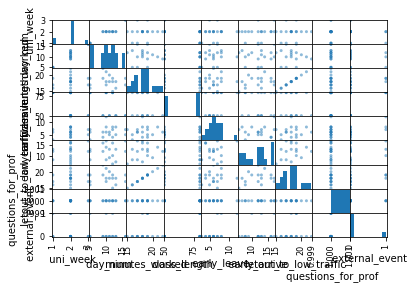

In [69]:
scatter_matrix(mdf, alpha=0.5)

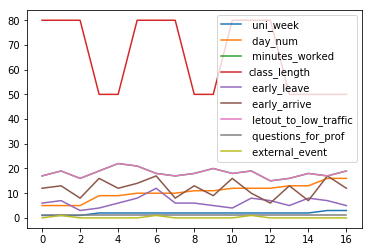

In [70]:
mdf.plot()